source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath1 = 'dataframe.csv' #if file is not in same dir as notebook, must change path
filepath2 = 'dataframe_all_timestamps.csv' #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [82]:
#tag analysis

df.loc[:,'tags_list'] = df['tags'].str.lower().str.replace(r'"','').str.split('|')
df['tags_list']

0         [voxmakers, fermez la, alert spoiler, matthew ...
1         [vide grenier, vide grenier live, brocante, je...
2         [قناة أخبار اليوم, يومية المغرب, دولية, قضية ا...
3         [مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو...
4         [portokalli, comedy show, top channel albania,...
                                ...                        
171144    [elbotola.com, elbotolatv, elbotolamedia, البط...
171145    [leckerschmecker, rezepte, kochen, backen, koc...
171146    [рецепт, дачный рецепт, рецепт на углях, рецеп...
171147    [wissen2go, mrwissen2go, fußballweltmeistersch...
171148         [call of duty, cod, activision, black ops 4]
Name: tags_list, Length: 171149, dtype: object

In [9]:
mexico = df['country'] == 'MX'

df_mexico = df[mexico]
df_mexico

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
29,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX,2017-11-12 22:23:08,10.688530,4.718499,3.912023,2.944439
30,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX,2017-11-13 15:00:00,9.354787,7.111512,3.806662,5.624018
31,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX,2017-11-13 13:00:01,10.642755,7.037906,3.891820,3.688879
32,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX,2017-11-13 17:12:40,9.361687,5.257495,2.639057,1.791759
33,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX,2017-11-13 03:59:04,11.022278,8.289791,5.153292,6.107023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170901,ohO_3RcXc_M,2018-06-14,Boda Sin Travesti 😩🏃‍♂️👯 | Caso Cerrado | Tele...,Caso Cerrado,24,Entertainment,2018-06-12,23:00:02,"Telemundo|""doctora ana maria polo""|""batallas l...",185263,1515,219,364,https://i.ytimg.com/vi/ohO_3RcXc_M/default.jpg,False,False,False,Video oficial del controvertido programa de Te...,MX,2018-06-12 23:00:02,12.129537,7.323831,5.393628,5.899897
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244
170903,i7r_kMbyngk,2018-06-14,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,News & Politics,2018-06-13,01:15:08,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...,MX,2018-06-13 01:15:08,11.709109,8.177235,4.077537,6.198479
170904,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,Entertainment,2018-06-13,15:08:53,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paí...,MX,2018-06-13 15:08:53,9.551658,6.289716,1.945910,4.510860


In [32]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27900 entries, 29 to 170906
Data columns (total 25 columns):
video_id                  27900 non-null object
trending_date             27900 non-null object
title                     27900 non-null object
channel_title             27900 non-null object
category_id               27900 non-null int64
category                  27900 non-null object
publish_date              27900 non-null object
publish_time              27900 non-null object
tags                      27900 non-null object
views                     27900 non-null int64
likes                     27900 non-null int64
dislikes                  27900 non-null int64
comment_count             27900 non-null int64
thumbnail_link            27900 non-null object
comments_disabled         27900 non-null bool
ratings_disabled          27900 non-null bool
video_error_or_removed    27900 non-null bool
description               27900 non-null object
country                   27900 non-

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
29,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX,2017-11-12 22:23:08,10.688530,4.718499,3.912023,2.944439,[fuerte temblor en irak hoy 12 de noviembre 21...
30,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX,2017-11-13 15:00:00,9.354787,7.111512,3.806662,5.624018,"[decoraciones para navidad, ideas para decorar..."
31,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX,2017-11-13 13:00:01,10.642755,7.037906,3.891820,3.688879,"[frases de amor, frases bonitas, frases de amo..."
32,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX,2017-11-13 17:12:40,9.361687,5.257495,2.639057,1.791759,[caballo sereno despide emotivamente a su dueñ...
33,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX,2017-11-13 03:59:04,11.022278,8.289791,5.153292,6.107023,"[hotspanish, hotspanish vlogs, video oficial, ..."


In [25]:
df_mexico.loc[:,'tags_list'] = df['tags'].str.lower().str.replace(r'"','').str.split('|')
df['tags_list']

0         [voxmakers, fermez la, alert spoiler, matthew ...
1         [vide grenier, vide grenier live, brocante, je...
2         [قناة أخبار اليوم, يومية المغرب, دولية, قضية ا...
3         [مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو...
4         [portokalli, comedy show, top channel albania,...
                                ...                        
171144    [elbotola.com, elbotolatv, elbotolamedia, البط...
171145    [leckerschmecker, rezepte, kochen, backen, koc...
171146    [рецепт, дачный рецепт, рецепт на углях, рецеп...
171147    [wissen2go, mrwissen2go, fußballweltmeistersch...
171148         [call of duty, cod, activision, black ops 4]
Name: tags_list, Length: 171149, dtype: object

In [16]:
def amigos(row):
    if 'amigos' in row:
        return True
    else:
        return False
    
amigos_df = df_mexico[df_mexico['tags_list'].apply(amigos)]
amigos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 2364 to 170085
Data columns (total 25 columns):
video_id                  85 non-null object
trending_date             85 non-null object
title                     85 non-null object
channel_title             85 non-null object
category_id               85 non-null int64
category                  85 non-null object
publish_date              85 non-null object
publish_time              85 non-null object
tags                      85 non-null object
views                     85 non-null int64
likes                     85 non-null int64
dislikes                  85 non-null int64
comment_count             85 non-null int64
thumbnail_link            85 non-null object
comments_disabled         85 non-null bool
ratings_disabled          85 non-null bool
video_error_or_removed    85 non-null bool
description               85 non-null object
country                   85 non-null object
publish_timestamp         85 non-null datetime

In [31]:
def amlo(row):
    if 'amlo' in row:
        return True
    else:
        return False
    
amlo_df = df_mexico[df_mexico['tags_list'].apply(amlo)]
amlo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 142 to 170903
Data columns (total 25 columns):
video_id                  787 non-null object
trending_date             787 non-null object
title                     787 non-null object
channel_title             787 non-null object
category_id               787 non-null int64
category                  787 non-null object
publish_date              787 non-null object
publish_time              787 non-null object
tags                      787 non-null object
views                     787 non-null int64
likes                     787 non-null int64
dislikes                  787 non-null int64
comment_count             787 non-null int64
thumbnail_link            787 non-null object
comments_disabled         787 non-null bool
ratings_disabled          787 non-null bool
video_error_or_removed    787 non-null bool
description               787 non-null object
country                   787 non-null object
publish_timestamp         7

In [79]:
def challenge(row):
    if 'challenge' in row:
        return True
    else:
        return False
    
challenge_df = df_mexico[df_mexico['tags_list'].apply(challenge)]
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 184 to 169238
Data columns (total 25 columns):
video_id                  248 non-null object
trending_date             248 non-null object
title                     248 non-null object
channel_title             248 non-null object
category_id               248 non-null int64
category                  248 non-null object
publish_date              248 non-null object
publish_time              248 non-null object
tags                      248 non-null object
views                     248 non-null int64
likes                     248 non-null int64
dislikes                  248 non-null int64
comment_count             248 non-null int64
thumbnail_link            248 non-null object
comments_disabled         248 non-null bool
ratings_disabled          248 non-null bool
video_error_or_removed    248 non-null bool
description               248 non-null object
country                   248 non-null object
publish_timestamp         2

In [85]:
def latino(row):
    if 'latino' in row:
        return True
    else:
        return False
    
latino_df = df_mexico[df_mexico['tags_list'].apply(latino)]
latino_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2253 to 169218
Data columns (total 25 columns):
video_id                  217 non-null object
trending_date             217 non-null object
title                     217 non-null object
channel_title             217 non-null object
category_id               217 non-null int64
category                  217 non-null object
publish_date              217 non-null object
publish_time              217 non-null object
tags                      217 non-null object
views                     217 non-null int64
likes                     217 non-null int64
dislikes                  217 non-null int64
comment_count             217 non-null int64
thumbnail_link            217 non-null object
comments_disabled         217 non-null bool
ratings_disabled          217 non-null bool
video_error_or_removed    217 non-null bool
description               217 non-null object
country                   217 non-null object
publish_timestamp         

In [61]:
def gobierno(row):
    if 'gobierno' in row:
        return True
    else:
        return False
    
gobierno_df = df_mexico[df_mexico['tags_list'].apply(gobierno)]
gobierno_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 2358 to 165391
Data columns (total 25 columns):
video_id                  21 non-null object
trending_date             21 non-null object
title                     21 non-null object
channel_title             21 non-null object
category_id               21 non-null int64
category                  21 non-null object
publish_date              21 non-null object
publish_time              21 non-null object
tags                      21 non-null object
views                     21 non-null int64
likes                     21 non-null int64
dislikes                  21 non-null int64
comment_count             21 non-null int64
thumbnail_link            21 non-null object
comments_disabled         21 non-null bool
ratings_disabled          21 non-null bool
video_error_or_removed    21 non-null bool
description               21 non-null object
country                   21 non-null object
publish_timestamp         21 non-null datetime

ValueError: hist method requires numerical columns, nothing to plot.

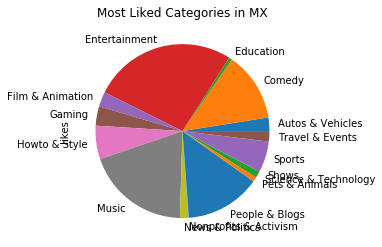

In [13]:
df_mexico.groupby('category')['likes'].agg('max').plot(kind='pie',title='Most Liked Categories in MX')

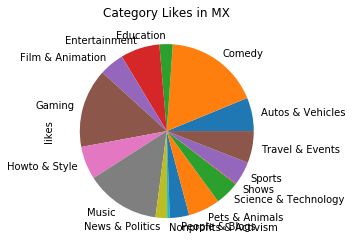

In [28]:
df_mexico.groupby('category')['likes'].agg('mean').plot(kind='pie',title='Category Likes in MX')

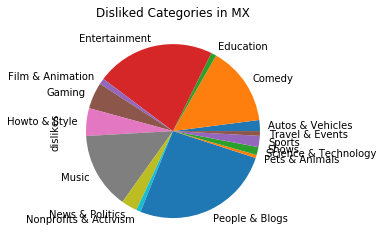

In [21]:
df_mexico.groupby('category')['dislikes'].agg('max').plot(kind='pie',title='Most Disliked Categories in MX')

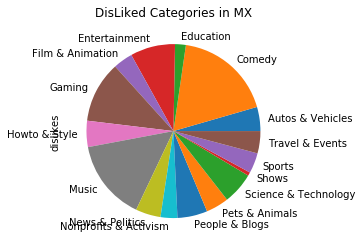

In [26]:
df_mexico.groupby('category')['dislikes'].agg('mean').plot(kind='pie',title='DisLiked Categories in MX')

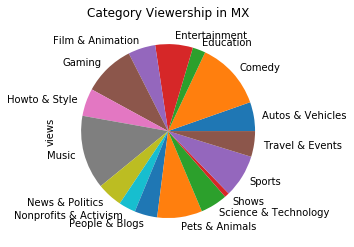

In [19]:
df_mexico.groupby('category')['views'].agg('mean').plot(kind='pie',title='Category Viewership in MX')

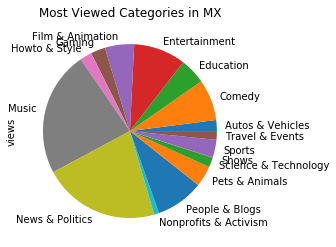

In [20]:
df_mexico.groupby('category')['views'].agg('max').plot(kind='pie',title='Most Viewed Categories in MX')

In [58]:
df_mexico_minmax = df_mexico.groupby('category')[['views','likes','dislikes']].aggregate(['max','min'])
max_views = df_mexico_minmax['views']['max']
df_mexico[df_mexico['views'].isin(max_views)].sort_values(by='views', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
145349,8-mloCL49vs,2018-05-13,Karol G - Mi Cama,KarolGVEVO,10,Music,2018-05-11,04:00:00,"Karol|""Mi""|""Cama""|""Universal""|""Music""|""Latino""...",23291675,281529,16377,14820,https://i.ytimg.com/vi/8-mloCL49vs/default.jpg,False,False,False,Music video by Karol G performing Mi Cama. © 2...,MX,2018-05-11 04:00:00,16.963607,12.547994,9.703694,9.603800,"[karol, mi, cama, universal, music, latino, la..."
167114,wzbik17wFVw,2018-06-10,Aquí mi respuesta a los nuevos ataques del gob...,RICARDO ANAYA,25,News & Politics,2018-06-08,03:06:01,"ricardo anaya cortés|""coalición por méxico al ...",21716633,0,0,0,https://i.ytimg.com/vi/wzbik17wFVw/default.jpg,True,True,False,Les pido me ayuden a difundirla.,MX,2018-06-08 03:06:01,16.893589,0.000000,0.000000,0.000000,"[ricardo anaya cortés, coalición por méxico al..."
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
130333,ummI3h6Lbm0,2018-04-26,Crema y Quesos LALA®,LALA México,22,People & Blogs,2018-04-09,22:03:12,"recetas|""comida""|""crema""",8940772,131,229,47,https://i.ytimg.com/vi/ummI3h6Lbm0/default.jpg,False,False,False,"¡Adivinaste, tus sospechas eran ciertas! Jaque...",MX,2018-04-09 22:03:12,16.006133,4.882802,5.438079,3.871201,"[recetas, comida, crema]"
42531,PALcJ0HW1-I,2018-01-05,WALK IN THE WOODS WITH A LOGAN PAUL MEME,PewDiePie,23,Comedy,2018-01-02,17:12:39,[none],7678558,433759,28404,43147,https://i.ytimg.com/vi/PALcJ0HW1-I/default.jpg,False,False,False,Full song: https://www.youtube.com/watch?v=n38...,MX,2018-01-02 17:12:39,15.853942,12.980247,10.254320,10.672391,[[none]]
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244,[[none]]
147246,UOwU1Gcp42I,2018-05-15,Jack Russell Terrier Meeting German Shepherd F...,Alyza Vlogs,15,Pets & Animals,2018-05-13,16:25:18,"Jack Russell Terrier|""Meeting""|""German Shepher...",3886909,5698,2812,181,https://i.ytimg.com/vi/UOwU1Gcp42I/default.jpg,False,False,False,In this video show about village dogs meeting ...,MX,2018-05-13 16:25:18,15.173125,8.648046,7.942007,5.204007,"[jack russell terrier, meeting, german shepher..."
62887,t6jLE2PIOYU,2018-02-01,"Royal Rumble Kickoff: Jan. 28, 2018",WWE,17,Sports,2018-01-29,00:15:24,"wrestling|""submission wrestling""|""wwe""|""profes...",3306032,52279,2917,1682,https://i.ytimg.com/vi/t6jLE2PIOYU/default.jpg,False,False,False,"Catch all the late-breaking news, expert analy...",MX,2018-01-29 00:15:24,15.011260,10.864369,7.978654,7.428333,"[wrestling, submission wrestling, wwe, profess..."
97653,ggtJKDJdBSo,2018-03-14,VICTORIA TRAS VICTORIA - Directo LEGENDARIO - ...,elrubiusOMG,20,Gaming,2018-03-12,04:14:49,[none],2712862,172796,3934,

In [68]:
df_mexico_minmax = df_mexico.groupby('category')[['views','likes','dislikes']].aggregate(['max','min'])
max_views = df_mexico_minmax['likes']['max']
df_mexico[df_mexico['likes'].isin(max_views)].sort_values(by='likes', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
89292,qS6F64mj6LY,2018-03-04,Bad Bunny - Si Te Acuerdas | Video Oficial,Bad Bunny,10,Music,2018-03-01,17:00:04,"Bad|""Bunny""|""Bad Bunny""|""Dime Si Te Acuerdas""|...",18161484,975306,39757,53373,https://i.ytimg.com/vi/qS6F64mj6LY/default.jpg,False,False,False,-Click para suscribirte: http://bit.ly/badbunn...,MX,2018-03-01 17:00:04,16.714814,13.790508,10.590566,10.885079,"[bad, bunny, bad bunny, dime si te acuerdas, v..."
78842,osgnc2jNvL8,2018-02-20,BAILANDO SCOOBY DOO PA PA EN LA CALLE / JUKILOP,JukiLop,22,People & Blogs,2018-02-18,19:59:24,"jukilop|""linduras""|""pantojitas""|""kimberly""|""lo...",4476098,708484,12242,39157,https://i.ytimg.com/vi/osgnc2jNvL8/default.jpg,False,False,False,Hola familia JUKILOP ❤️ estamos muy contentos ...,MX,2018-02-18 19:59:24,15.314262,13.470884,9.412710,10.575360,"[jukilop, linduras, pantojitas, kimberly, loai..."
150948,3Je237UiSg0,2018-05-20,► ROAST YOURSELF CHALLENGE | Rayito,DebRyanShow,23,Comedy,2018-05-16,19:00:00,"2018|""De""|""DebRyanShow""|""DebRyan""|""deb""|""DebRy...",5987568,650194,27763,43381,https://i.ytimg.com/vi/3Je237UiSg0/default.jpg,False,False,False,¡Que onda Fritos! ¿Como están?→ Me Dicen Rayit...,MX,2018-05-16 19:00:00,15.605196,13.385028,10.231495,10.677800,"[2018, de, debryanshow, debryan, deb, debryan ..."
152473,we_oDwNJfEc,2018-05-22,Tu Mejor Versión (VIDEO OFICIAL) l Pautips,Pautips,26,Howto & Style,2018-05-20,21:00:05,"pautips|""pau tips""|""pautips youtube""|""pautips ...",1861341,315370,7237,23339,https://i.ytimg.com/vi/we_oDwNJfEc/default.jpg,False,False,False,Tu Mejor Versión (VIDEO OFICIAL) l Pautips Des...,MX,2018-05-20 21:00:05,14.436808,12.661505,8.887100,10.057924,"[pautips, pau tips, pautips youtube, pautips y..."
14477,ubyXi8c097Q,2017-12-01,MI VIAJE CON LOS JUGADORES DEL REAL MADRID,DjMaRiiO,17,Sports,2017-11-29,22:04:11,"fifa 18|""fifa18""|""fut 18""|""ultimate""|""team""|""d...",1295546,291773,1627,6154,https://i.ytimg.com/vi/ubyXi8c097Q/default.jpg,False,False,False,► SUSCRÍBETE AQUÍ: http://goo.gl/Fd9Cwb\n➜ Síg...,MX,2017-11-29 22:04:11,14.074444,12.583735,7.395108,8.725020,"[fifa 18, fifa18, fut 18, ultimate, team, djma..."
22452,zf4uXHdt_R4,2017-12-11,🔴 MI GATITA KIRA 😍,VEGETTA777,20,Gaming,2017-12-09,18:44:15,"kira|""PLAYERUNKNOWN'S BATTLEGROUNDS""|""directo""...",1226875,181285,2874,4348,https://i.ytimg.com/vi/zf4uXHdt_R4/default.jpg,False,False,False,* Hoy probaremos el nuevo mapa de PLAYERUNKNOW...,MX,2017-12-09 18:44:15,14.019982,12.107831,7.963808,8.377701,"[kira, playerunknown's battlegrounds, directo,..."
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
112109,A_KOtwWQfwQ,2018-03-31,NUEVOS FRENOS AL BVOCHIDISIMO!! | JUCA,JUCA,2,Autos & Vehicles,2018-03-28,22:30:00,"tuning|""modificaciones""|""juca""|""jucaviapri""|""e...",2042879,126991,2349,9408,https://i.ytimg.com/vi/A_KOtwWQfwQ/default.jpg,False,False,False,"Muchas gracias por ver e

In [76]:
df_mexico_minmax = df_mexico.groupby('category')[['views','likes','dislikes']].aggregate(['max','min'])
max_views = df_mexico_minmax['dislikes']['max']
df_mexico[df_mexico['dislikes'].isin(max_views)].sort_values(by='dislikes', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
97502,5d0lsUiM0zo,2018-03-14,Dragon ball super capitulo 130 +adelanto del c...,UNA SOLA FUERZA,22,People & Blogs,2018-03-11,01:13:19,[none],2924859,13758,127684,11742,https://i.ytimg.com/vi/5d0lsUiM0zo/default.jpg,False,False,False,Dale like (y) y suscribe te te te,MX,2018-03-11 01:13:19,14.888757,9.529448,11.757322,9.371013,[[none]]
154872,NKkidyHNu7M,2018-05-25,KENISCO ES FALSO | soyFranciscoALV,Soy Francisco ALV,24,Entertainment,2018-05-23,19:47:17,"soyfranciscoalv|""jd""|""pantoja""|""juandediospant...",2350921,185353,108028,76596,https://i.ytimg.com/vi/NKkidyHNu7M/default.jpg,False,False,False,HOLA MI GENTE ESPERO QUE TE SUSCRIBAS A ESTE B...,MX,2018-05-23 19:47:17,14.670318,12.130023,11.590155,11.246313,"[soyfranciscoalv, jd, pantoja, juandediospanto..."
115971,_-ROGp4oqwM,2018-04-04,DosogasTeam - QUE CALLEN A LOS BOBOS (Llegaron...,dosogas,23,Comedy,2018-04-01,23:29:00,"dosogas|""dosogas youtube""|""dos ogas""|""dosogas ...",4259318,462161,72045,115803,https://i.ytimg.com/vi/_-ROGp4oqwM/default.jpg,False,False,False,Les presentamos nuestra nueva cancion! QUE CAL...,MX,2018-04-01 23:29:00,15.264620,13.043671,11.185060,11.659654,"[dosogas, dosogas youtube, dos ogas, dosogas f..."
102732,L53126JeTsM,2018-03-20,Gucci Gang Remix - Lil Pump x Bad Bunny x J Ba...,WorldMusic TV,10,Music,2018-03-18,14:47:27,"gucci gang|""gucci gang remix""|""bad bunny""|""ozu...",7023427,278432,69706,30194,https://i.ytimg.com/vi/L53126JeTsM/default.jpg,False,False,False,WorldMusic TV Presenta :\nGucci Gang Remix - L...,MX,2018-03-18 14:47:27,15.764762,12.536933,11.152056,10.315432,"[gucci gang, gucci gang remix, bad bunny, ozun..."
117222,cy1l7TMed2Q,2018-04-05,AMORFODA - Cover Kika Nieto ft. Santimaye,Kika Nieto,26,Howto & Style,2018-04-03,21:30:00,"kika|""amorfoda""|""santimaye""|""cover""|""music""|""l...",1586384,150876,25218,19702,https://i.ytimg.com/vi/cy1l7TMed2Q/default.jpg,False,False,False,Pinguiiiiis!\nComo se que a muchos de ustedes ...,MX,2018-04-03 21:30:00,14.276968,11.924220,10.135353,9.888526,"[kika, amorfoda, santimaye, cover, music, love..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57240,WGi6QIm54vo,2018-01-25,ESTO PASO EN EL VÍDEO DE LOS #10MillonesEnLosP...,Kler Polinesia,24,Entertainment,2018-01-25,02:10:46,[none],31148,4320,52,576,https://i.ytimg.com/vi/WGi6QIm54vo/default.jpg,False,False,False,REDES SOCIALES 💕: \n\nInstagram:\n🐶 http://ins...,MX,2018-01-25 02:10:46,10.346537,8.371242,3.970292,6.357842,[[none]]
55395,urEAfC_OPxA,2018-01-23,El joven de los cosplays baratos ataca de nuev...,Oso Ted,24,Entertainment,2018-01-22,20:21:23,"cosplays|""joven de los cosplays""|""joven de los...",22847,765,52,84,https://i.ytimg.com/vi/urEAfC_OPxA/default.jpg,False,False,False,Los cosplays baratos son las especialidad de e...,MX,2018-01-22 20:21:23,10.036619,6.641182,3.970292,4.442651,"[cosplays, joven de los cosplays, joven de los..."
54524,lJ-2gkQbZO8,2018-01-22,Javier Corral reta a Peña Nieto !!! Ya viene ...,fejevi fejevi,24,Entertainment,2018-01-21,00:28:52,"javier corral|""#UnidosConValor""|""unidos con va...",58324,1332,52,444,https://i.ytimg.com/vi/lJ-2gkQbZO8/default.jpg,False,False,False,Javier Corral reta a Peña Nieto !!! Ya viene ...,MX,2018-01-21 00:28:52,10.973786,7.195187,3.970292,6.098074,"[javier corral, #unidosconvalor, unidos con va..."
51746,iYQAlsANBZk,2018-01-18,16 Cosas que no tienen sentido en Voldemort Or...,Rubén Caballero Petrova,24,Entertainment,2018-01-17,22:02:57,"Voldemort Origins of the Heir|""Lord Voldemort""...",22379,2037,52,372,https://i.ytimg.com/vi/iYQAlsANBZk/default.jpg,False,False,False,Voldemort Origins of the Heir es una película ..

In [41]:
df_mexico[df_mexico['views']==23291675]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
145349,8-mloCL49vs,2018-05-13,Karol G - Mi Cama,KarolGVEVO,10,Music,2018-05-11,04:00:00,"Karol|""Mi""|""Cama""|""Universal""|""Music""|""Latino""...",23291675,281529,16377,14820,https://i.ytimg.com/vi/8-mloCL49vs/default.jpg,False,False,False,Music video by Karol G performing Mi Cama. © 2...,MX,2018-05-11 04:00:00,16.963607,12.547994,9.703694,9.6038,"[karol, mi, cama, universal, music, latino, la..."


In [40]:
df_mexico.agg()

TypeError: stat_func() got multiple values for argument 'axis'

In [ ]:
df_all_timestamps.info()

/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:969: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **self.kwds


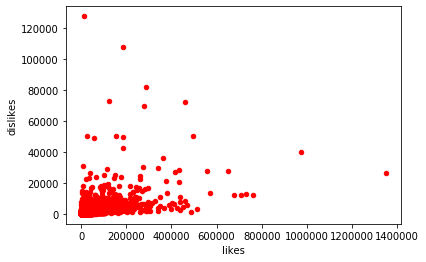

In [35]:
df_mexico.plot(x='likes',y='dislikes',kind='scatter',color='R')

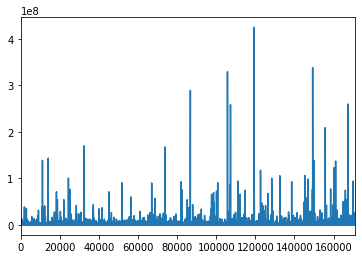

In [14]:
df['views'].plot()

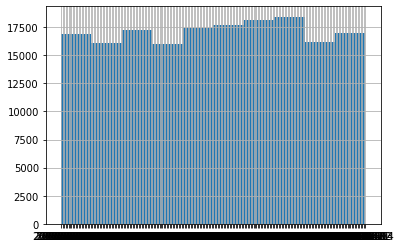

In [16]:
df['trending_date'].hist()

In [18]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10 17:00:03
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33


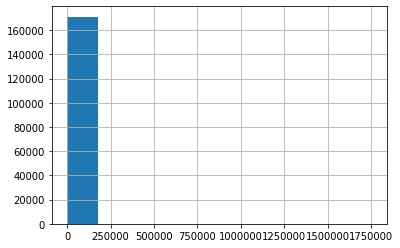

In [20]:
df['dislikes'].hist()

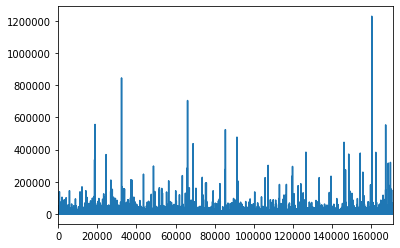

In [22]:
df['comment_count'].plot()

In [23]:
df.describe()

,category_id,views,likes,dislikes,comment_count,log_views,log_likes,log_dislikes,log_comment_count
count,171149.000000,1.711490e+05,1.711490e+05,1.711490e+05,1.711490e+05,171149.000000,171149.000000,171149.000000,171149.000000
mean,20.922576,3.628359e+05,1.010452e+04,6.533677e+02,1.304655e+03,11.226726,7.177027,4.384055,5.291275
std,6.753576,2.888626e+06,5.417935e+04,6.348801e+03,7.834437e+03,1.693768,2.245591,1.966331,2.097233
min,1.000000,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.036953,0.000000,0.000000,0.000000
25%,20.000000,2.263500e+04,3.460000e+02,2.100000e+01,5.500000e+01,10.027297,5.849325,3.091042,4.025352
50%,24.000000,7.664000e+04,1.498000e+03,7.900000e+01,2.350000e+02,11.246887,7.312553,4.382027,5.463832
75%,24.000000,2.424700e+05,5.830000e+03,2.900000e+02,8.320000e+02,12.398637,8.670944,5.673323,6.725034
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06,19.866514,15.540743,14.376996,14.021431


In [24]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519


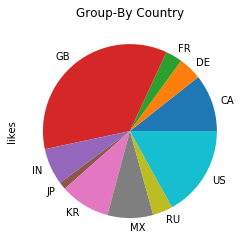

In [78]:
df.groupby('country')['likes'].agg('max').plot(kind='pie',title='Group-By Country')
# explore music category (it is the largest one)
# explore travel & events (it has the most trending video)
# explore autos & vehicles (it has the least trending video)


In [26]:
df_all_timestamps.describe()


,category_id,views,likes,dislikes,comment_count
count,356350.000000,3.563500e+05,3.563500e+05,3.563500e+05,3.563500e+05
mean,20.209847,1.383542e+06,3.964151e+04,2.130516e+03,4.366423e+03
std,7.166210,7.278916e+06,1.693050e+05,1.977425e+04,2.408002e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,5.076500e+04,7.700000e+02,4.500000e+01,1.230000e+02
50%,23.000000,1.907045e+05,3.875000e+03,1.940000e+02,5.550000e+02
75%,24.000000,6.874125e+05,1.893700e+04,7.980000e+02,2.148000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06


In [27]:
df.category_id.describe()

count    171149.000000
mean         20.922576
std           6.753576
min           1.000000
25%          20.000000
50%          24.000000
75%          24.000000
max          44.000000
Name: category_id, dtype: float64

In [28]:
df['views'].describe()

count    1.711490e+05
mean     3.628359e+05
std      2.888626e+06
min      1.530000e+02
25%      2.263500e+04
50%      7.664000e+04
75%      2.424700e+05
max      4.245389e+08
Name: views, dtype: float64

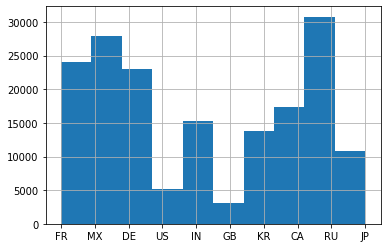

In [29]:
df['country'].hist()

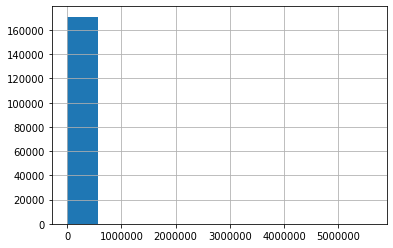

In [30]:
df['likes'].hist()

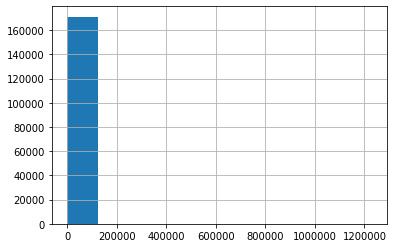

In [77]:
df['comment_count'].hist()

In [35]:
df['comment_count', 'category'].isin(['music']).hist()

KeyError: ('comment_count', 'category')

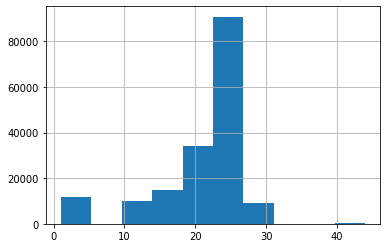

In [33]:
df['category_id'].hist()

In [ ]:
df.likes[:10].plot(kind = 'hist',subplots=True, layout = (4,3))

In [ ]:
df['country'].

In [ ]:
df_all_timestamps

In [ ]:
df.plot(x='likes',y='comment_count',kind='scatter',color='R')

In [ ]:
df.plot(x='comment_count',y='dislikes',kind='scatter',color='R')

In [ ]:
df

In [ ]:
category_id

In [ ]:
category_id.hist()

In [ ]:
category = df["category_id", "category"]

In [ ]:
category = df['category_id', 'category']

In [ ]:
category = pd.DataFrame(df, columns = ['category', 'category_id'])

In [ ]:
category.head()

In [4]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.describe()

NameError: name 'df' is not defined

In [2]:
df_all_timestamps.head()

NameError: name 'df_all_timestamps' is not defined

In [3]:
df['likes'].hist()

NameError: name 'df' is not defined

In [ ]:
df.plot.scatter('views', 'likes')

In [ ]:
df.plot.scatter('category_id', 'likes')

In [ ]:
df[['category','category_id']].groupby('category_id').agg('min')

In [ ]:
counts = df['category'].value_counts()
counts

In [ ]:
df_all_timestamps.describe()

In [42]:
df.aggregate(['min', 'max'])
#understand the relation between the two videos and why they are placed within
## view categories and determine their trends
###

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
min,#NAME?,2017-11-14,Désolé je ne vous avais pas vu ! 😱 👎 ✶ DO 65,! 세상에 무슨일이,1,Autos & Vehicles,2006-07-23,00:00:00,"!00% Sketch Comedy Show|""Reggie Greene""|""Tony ...",153,0,0,0,https://i.ytimg.com/vi/--1skHapGUc/default.jpg,False,False,False,,CA,2006-07-23 08:24:11,5.036953,0.000000,0.000000,0.000000
max,zzz0_5fMnI8,2018-06-14,"🧐8k Bitcoin rote Woche? Ethereum, Digibyte, Ve...",💜Sandrea,44,Travel & Events,2018-06-14,23:59:58,🚀 smartpixel.com.ua,424538912,5613827,1753274,1228655,https://i.ytimg.com/vi/zzz0_5fMnI8/default.jpg,True,True,True,🧠 Увеличь память: https://goo.gl/VjBGe4 \n\n📣 ...,US,2018-06-14 03:40:05,19.866514,15.540743,14.376996,14.021431


In [ ]:
df_all_timestamps.aggregate(['min', 'max'])

In [ ]:
df['category'].count()

In [ ]:
df['category_id'].count()

In [ ]:
df['likes'].max()

In [ ]:
df['dislikes'].max()

In [ ]:
df['dislikes'].aggregate[('max', 'min')]

In [ ]:
df.groupby(['likes', 'comment_count'])

In [ ]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.gca() 
sns.set_style("whitegrid")
sns.kdeplot(df[['likes', 'dislikes']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of likes and dislikes') 
ax.set_xlabel('comment_count') 
ax.set_ylabel('category')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca() 
sns.set_style("whitegrid")
sns.kdeplot(df['likes'], ax = ax)
ax.set_title('KDE plot of likes') 
ax.set_xlabel('category') 
ax.set_ylabel('likes')

In [ ]:
sns.lmplot(x = 'likes', y = 'comment_count', 
           data = df, 
           hue = "video_error_or_removed", 
           palette="Set2", fit_reg = False)   

In [ ]:
df['likes'].plot()

In [39]:
df.head()
df_simple = df[['country'].isin(['US'])][['title','views','likes','comment_count']]
df_simple.head()

AttributeError: 'list' object has no attribute 'isin'

In [ ]:
df_all_timestamps[df_all_timestamps['country'].isin(['US'])]

In [ ]:
df.groupby('category')['country'].agg('mean').plot(kind='pie',title='Group-By Categories')

In [41]:
df_all_timestamps[df_all_timestamps['country'].isin(['US'])][['title','views','likes','dislikes']]

,title,views,likes,dislikes
372,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,1277364,56867,2148
373,Ozuna - Música Sin Fronteras (A YouTube Docume...,1498866,67227,1473
374,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,280065,20289,38
375,Apple Clips sample,2259,0,0
376,Stephen A. Smith slams the Philadelphia 76ers ...,470191,4037,430
...,...,...,...,...
354807,REACTING TO MY FIRST YOUTUBE VIDEO | Jaclyn Hill,1180893,57488,3639
354808,GET READY WITH ME FOR THE MILITARY BALL! | Cas...,521611,22478,529
354809,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,12709520,1817699,11949
354957,How Black Panther Should Have Ended,5660813,192957,2846


In [48]:
df['channel_title'].aggregate(['min','max'])

min    ! 세상에 무슨일이
max      💜Sandrea
Name: channel_title, dtype: object

In [50]:
df.value_counts(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
df.mean()